In [ ]:
data<-read.table("../../data/2824259.txt", header=T,sep="\t")
head(data)
#The read.table() function can read data in a table form in a text file and store it as a dataframe in R.
#The command header=T specifies that the data contains the name of columns in the first row and the sep="\t" command denotes that the data across the fields are separated using tab.

,Condition,Patient,Gene,Expression
,<chr>,<chr>,<chr>,<int>
1,Disease,Patient1,HSP90AB1,0
2,Disease,Patient2,HSP90AB1,0
3,Healthy,Patient3,HSP90AB1,16
4,Healthy,Patient4,HSP90AB1,6
5,Disease,Patient1,HSP90AB1,1
6,Disease,Patient2,HSP90AB1,1


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 125 rows containing non-finite values (stat_boxplot).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 125 rows containing non-finite values (stat_ydensity).”


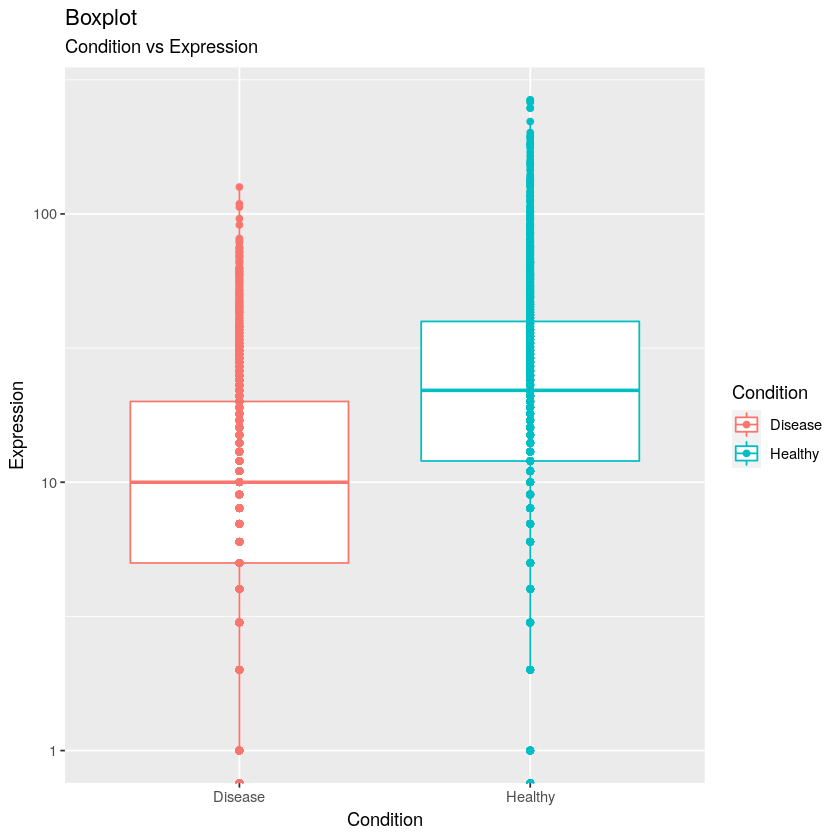

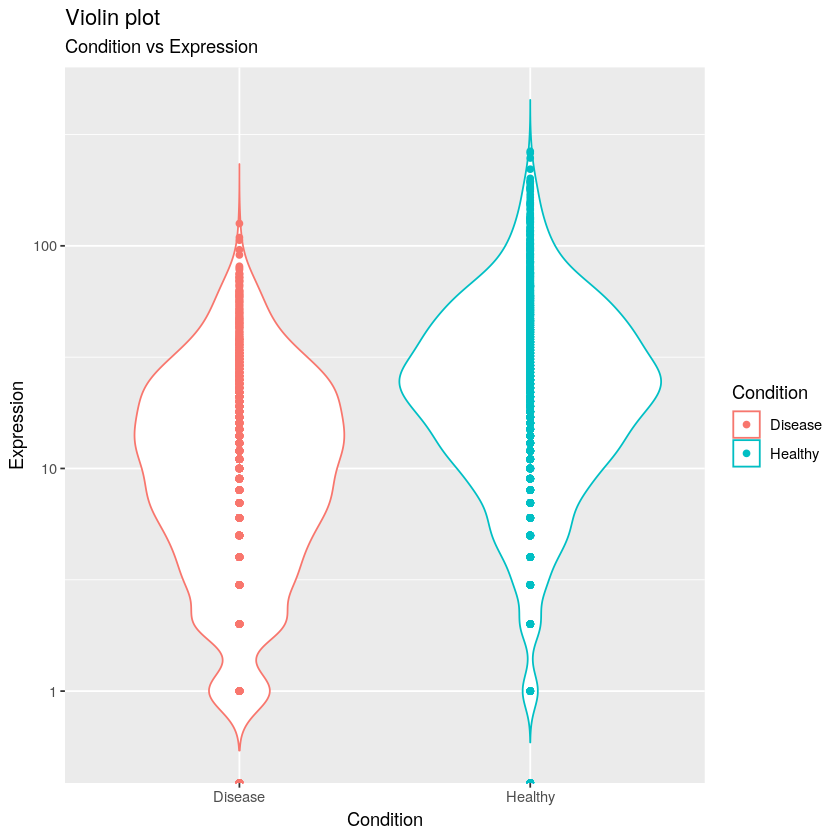

In [ ]:
library(ggplot2)
#The library() function loads the specific package.

s <- ggplot(data, aes(x=Condition, y=Expression, color=Condition))
s + geom_boxplot() + scale_y_continuous(trans='log10') + geom_point() + labs(title="Boxplot",
       subtitle="Condition vs Expression",
       x="Condition",
       y="Expression")
#The ggplot(data, aes(x=Condition, y=Expression, color=Condition)) and geom_boxplot() + scale_y_continuous(trans='log10') + geom_point()command creates a ggplot with a combination of boxplot and scatterplot showing the condition of patient plotted against their expression levels in a log10 scale in the y-axis.

s + geom_violin(trim=FALSE) + scale_y_continuous(trans='log10') + labs(title="Violin plot",
       subtitle="Condition vs Expression",
       x="Condition",
       y="Expression") + geom_point()
#These codes help in creating a violin plot along with a scatter plot by plotting the condition of the patients against their expression level with the y axis in a log10 scale and labelling the plots by labs() command.

In [ ]:
Condition1 <- data[data$Condition=="Disease",]
Condition2 <- data[data$Condition=="Healthy",]
#these codes create a new data frame for both disease and healthy condition respectively which contains only those data where the Condition column is equal to "Disease" or "Healthy". The comma indicates all the columns to be added in the new dataframe.
t.test(Condition1$Expression, Condition2$Expression)
#this command performs the statistical T test between the expression levels of diseased and healthy conditions


	Welch Two Sample t-test

data:  Condition1$Expression and Condition2$Expression
t = -20.597, df = 2911.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.83686 -13.90989
sample estimates:
mean of x mean of y 
 14.38238  29.75576 


In [ ]:
library(Seurat)
library(dplyr)
library(ggplot2)
#the library() function is loading the packages into this R session

In [ ]:
disease1<-readRDS("DISEASE1.rds")
disease1
disease2<-readRDS("DISEASE2.rds")
disease2
healthy1<-readRDS("HC1.rds")
healthy1
healthy2<-readRDS("HC2.rds")
healthy2
#the data is loaded using the readRDS() command where it reads the data and is renamed and displayed to show the data it contains.

An object of class Seurat 
29033 features across 3000 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 3000 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 3000 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 3000 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

In [ ]:
disease1[["percent.mt"]] <- PercentageFeatureSet(disease1, pattern = "^MT-")
disease2[["percent.mt"]] <- PercentageFeatureSet(disease2, pattern = "^MT-")
healthy1[["percent.mt"]] <- PercentageFeatureSet(healthy1, pattern = "^MT-")
healthy2[["percent.mt"]] <- PercentageFeatureSet(healthy2, pattern = "^MT-")
#this code calculates the percentage of gene expression of mitochondria by specifying it to select data which match with ^MT- and stores in a new column percent.mt for each condition data.

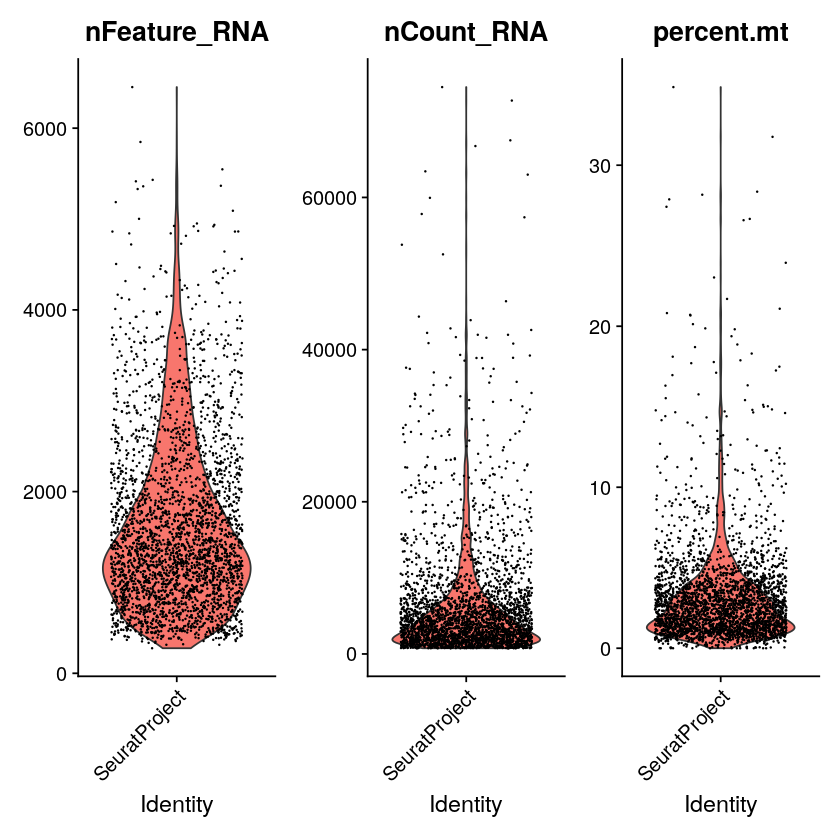

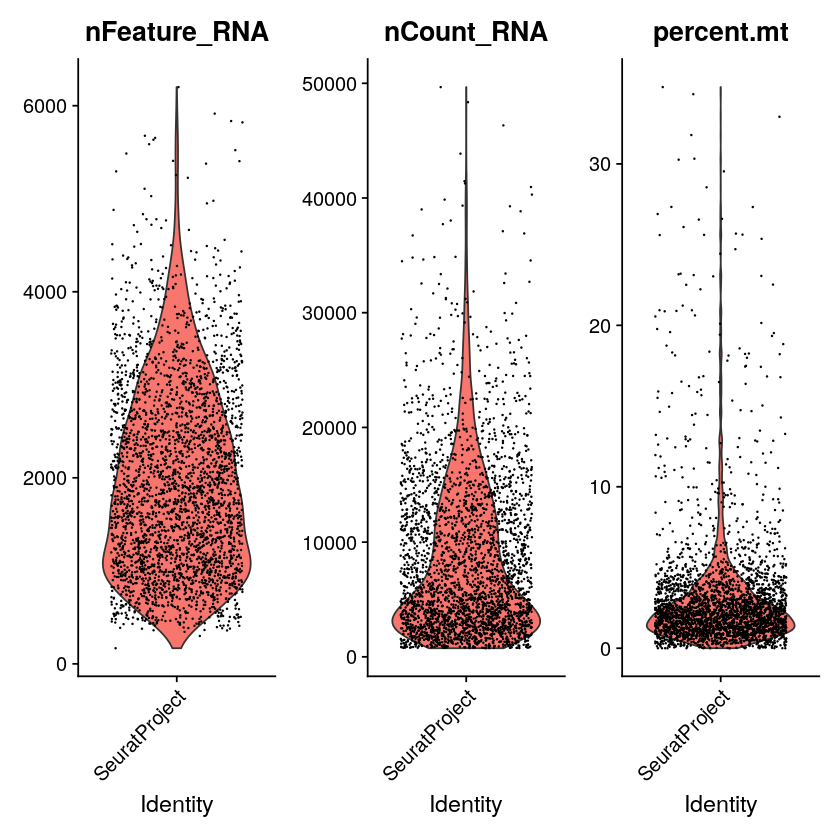

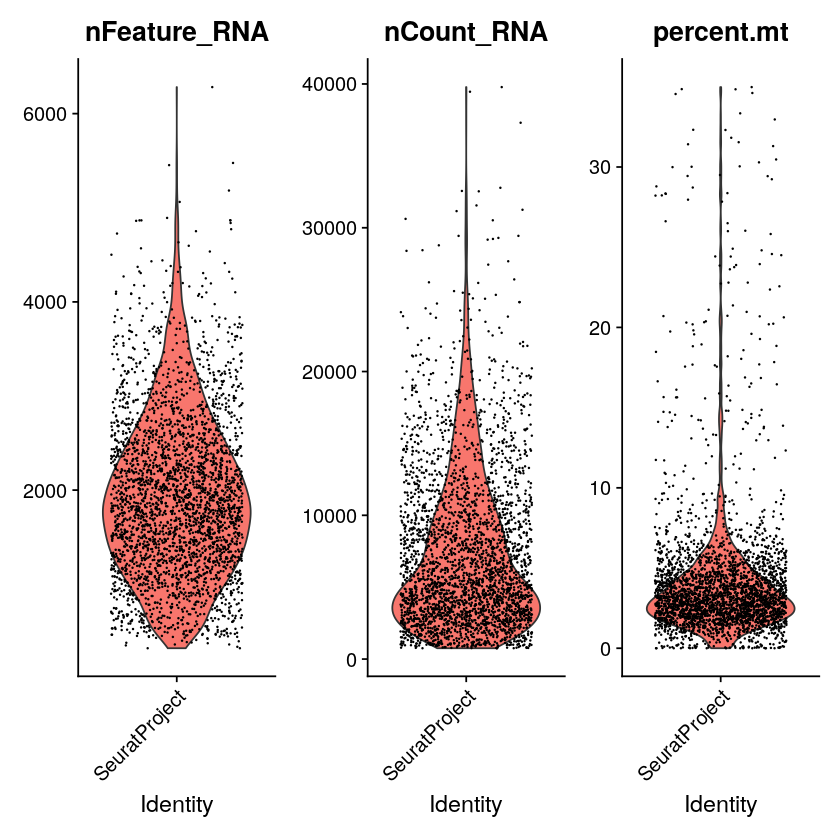

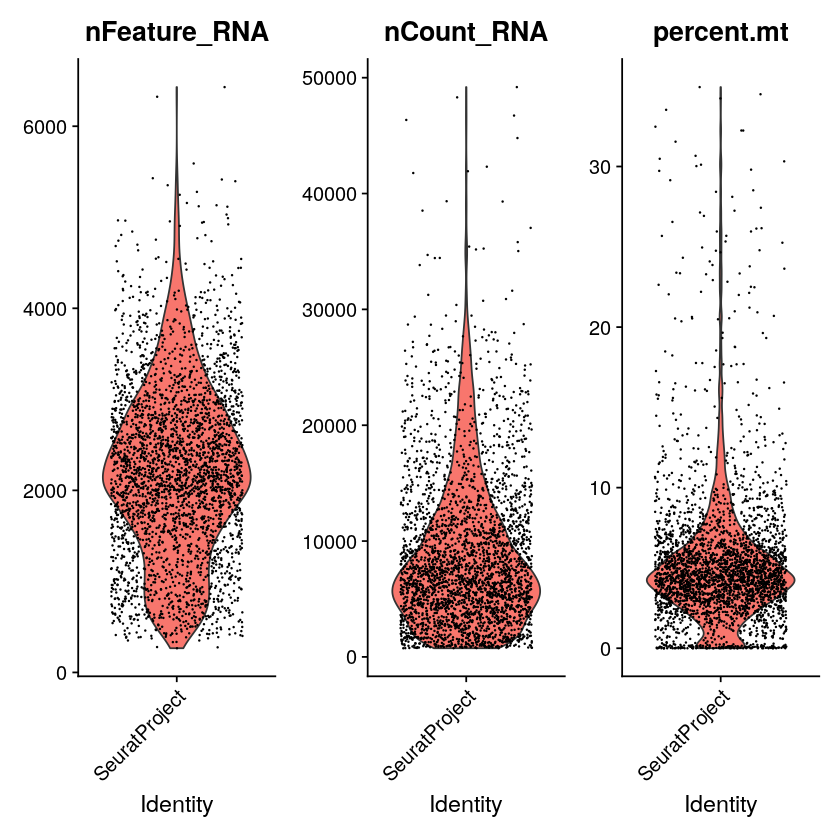

In [ ]:
VlnPlot(disease1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(disease2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(healthy1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(healthy2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
#this code creates a violin plot for each object by specifying the features as nFeature_RNA, nCountRNA and percent.MT and ncol=3 to denote that the 3 features will be shown in 3 different plots side by side.

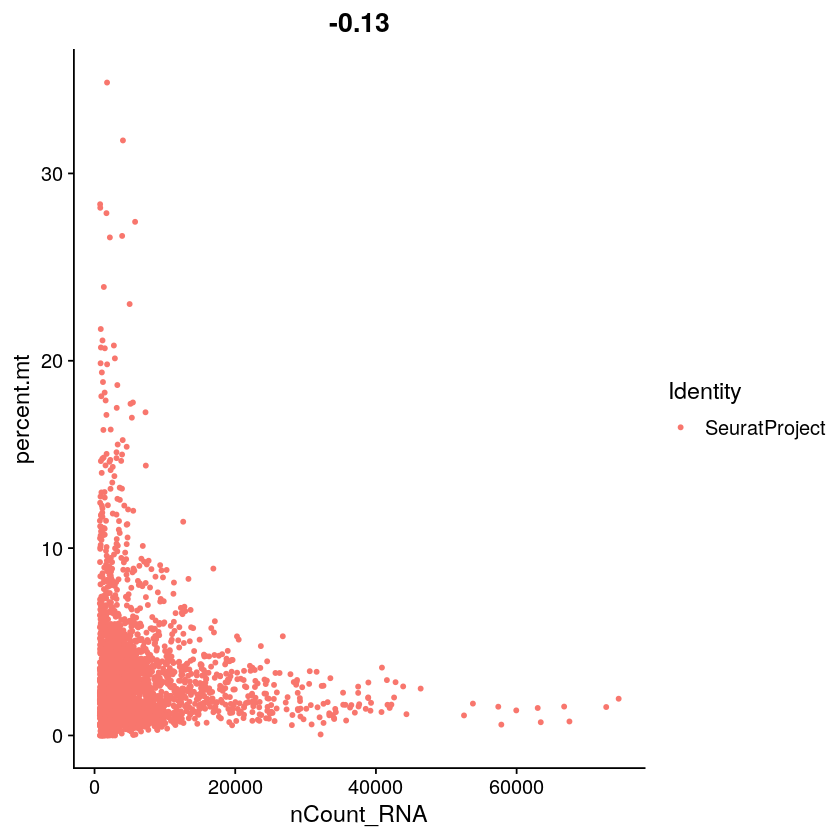

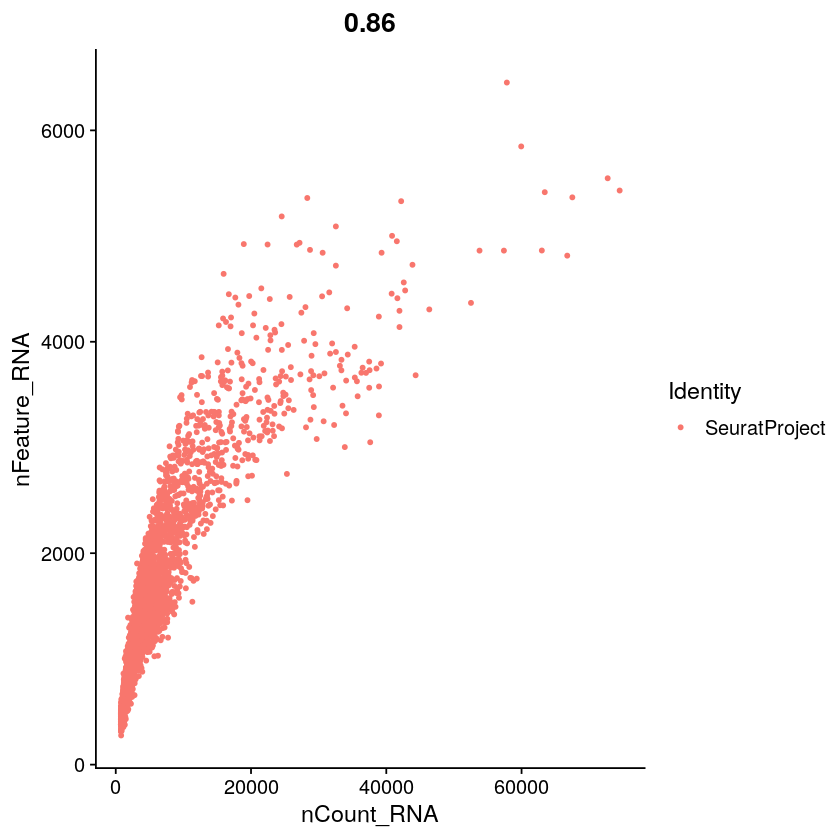

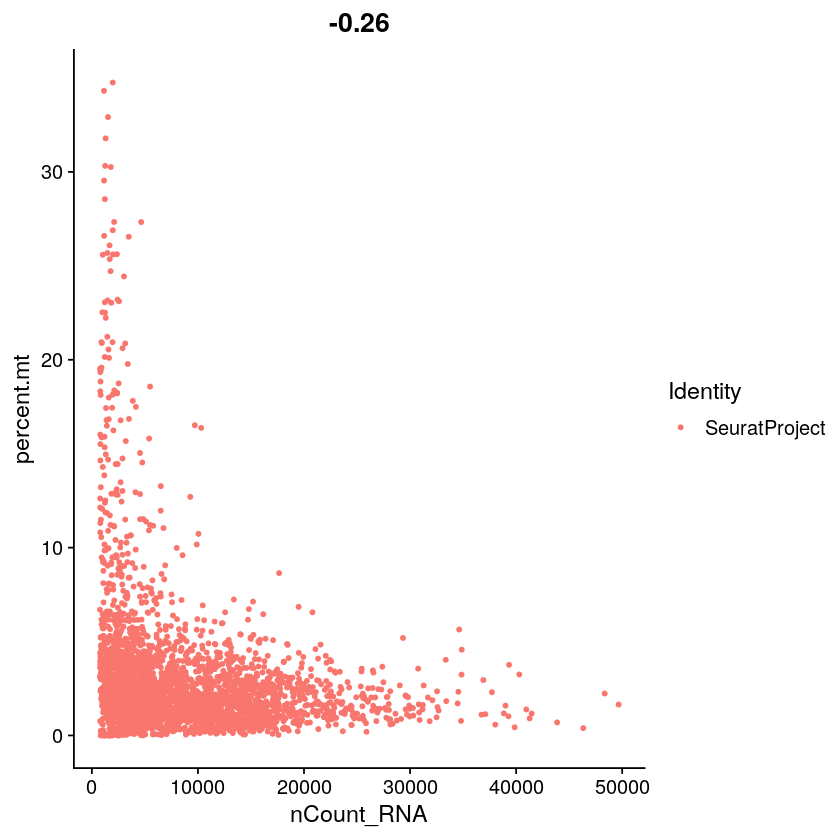

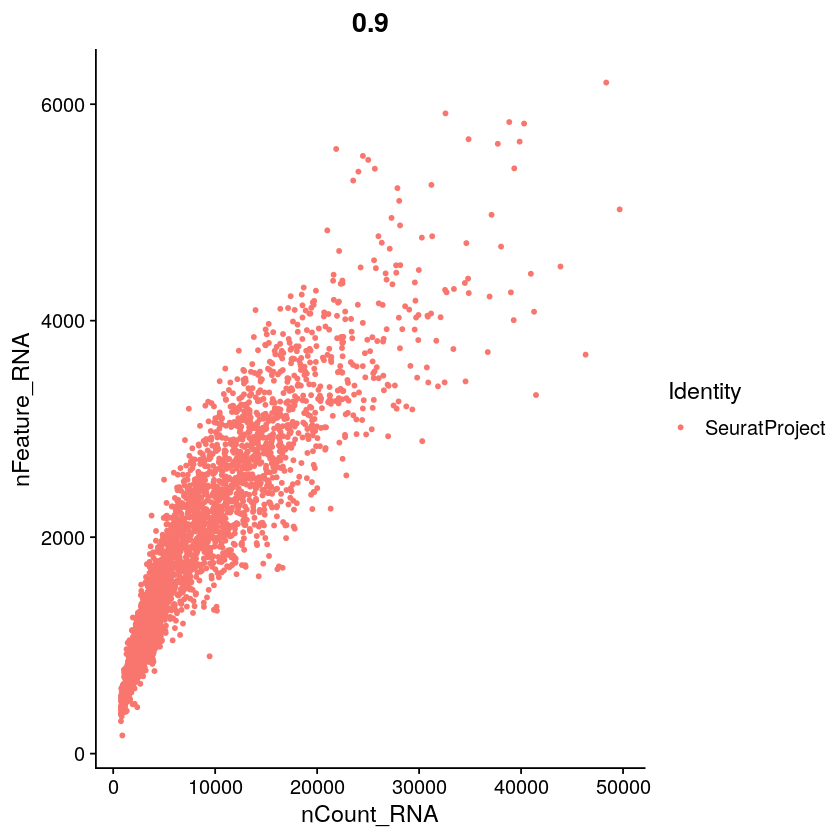

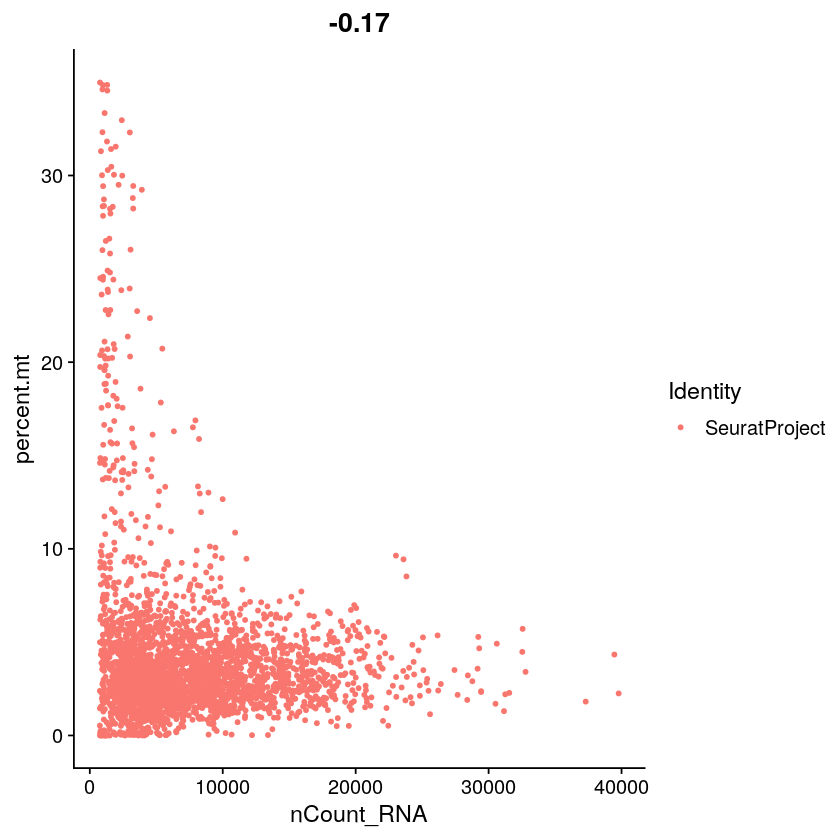

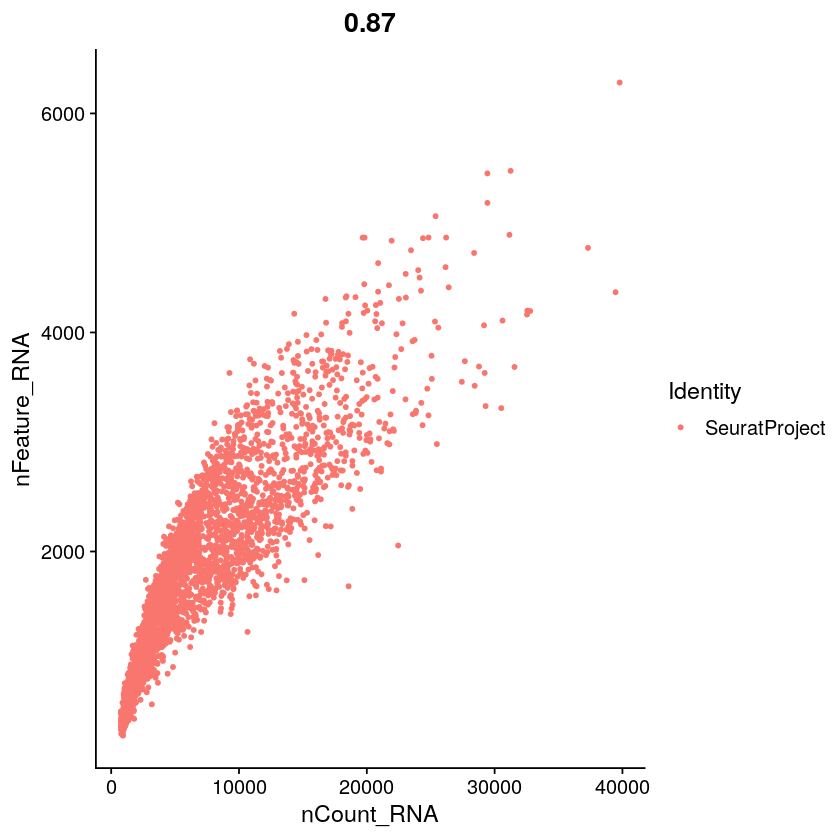

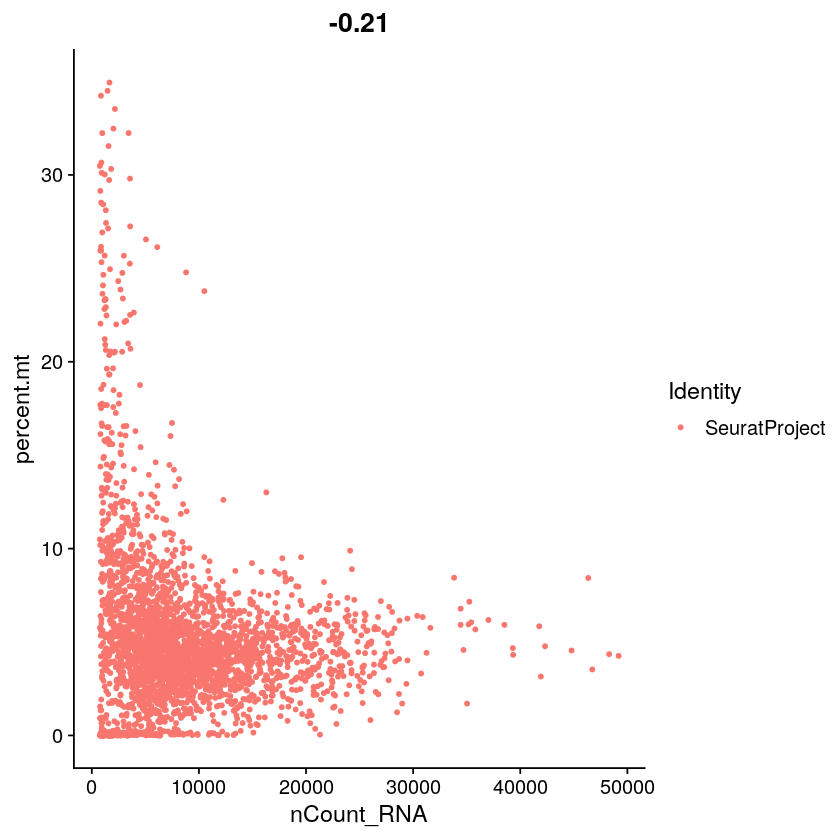

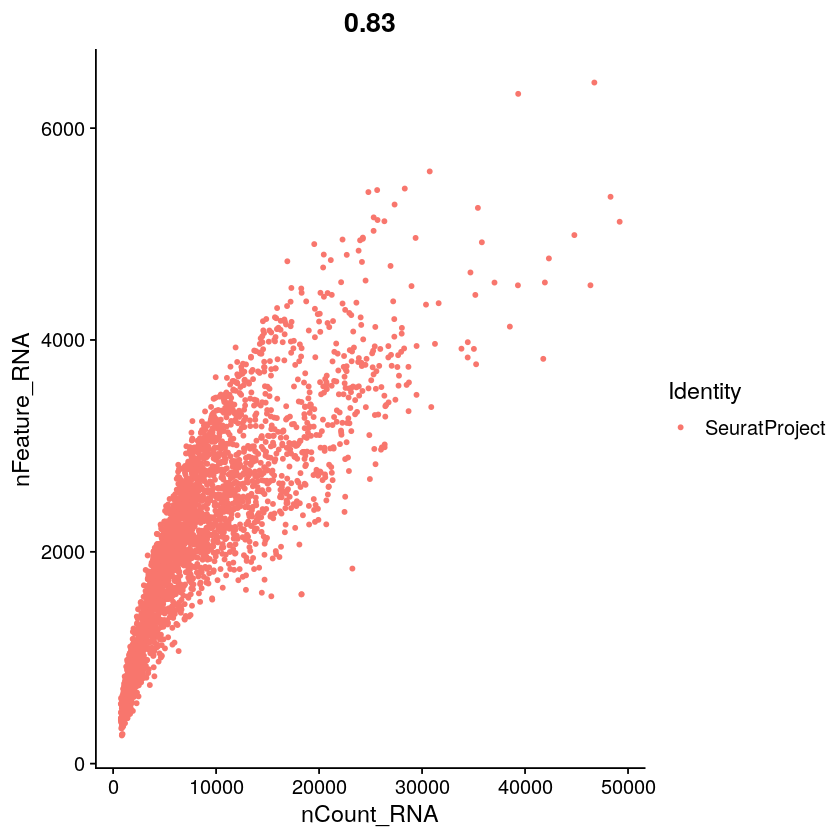

In [ ]:
plot1 <- FeatureScatter(disease1, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(disease1, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1
plot2

plot3 <- FeatureScatter(disease2, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot4 <- FeatureScatter(disease2, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot3
plot4

plot5 <- FeatureScatter(healthy1, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot6 <- FeatureScatter(healthy1, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot5
plot6

plot7 <- FeatureScatter(healthy2, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot8 <- FeatureScatter(healthy2, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot7
plot8
#this code creates a scatter plot to find and view the relationship between two features such as nCountRNA with percent.mt and nCountRNA with nFeatureRNA.
#these plots are used to filter cells of low quality and high percentage of mitochondiral content in order to proceed with further downstream analysis.

In [ ]:
disease1 <- subset(disease1, subset = nFeature_RNA > 200 & nFeature_RNA < 4200 & percent.mt < 15)
disease1
disease2<- subset(disease2, subset = nFeature_RNA > 250 & nFeature_RNA < 4350 & percent.mt< 10)
disease2
healthy1<- subset(healthy1,subset = nFeature_RNA > 200 & nFeature_RNA < 4200 & percent.mt < 10)
healthy1
healthy2<-subset(healthy2,subset = nFeature_RNA > 200 & nFeature_RNA< 4800 & percent.mt < 15)
healthy2
#this code is used to filter the cells by subsetting only those cells which meet a specific criteria based on the scatter and violin plots

An object of class Seurat 
29033 features across 2914 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 2821 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 2811 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

An object of class Seurat 
29033 features across 2871 samples within 1 assay 
Active assay: RNA (29033 features, 0 variable features)

In [ ]:
disease1 <- NormalizeData(disease1)
disease1 <- FindVariableFeatures(disease1, selection.method = "vst", nfeatures = 2000)

disease2 <- NormalizeData(disease2)
disease2 <- FindVariableFeatures(disease2, selection.method = "vst", nfeatures = 2000)

healthy1 <- NormalizeData(healthy1)
healthy1 <- FindVariableFeatures(healthy1, selection.method = "vst", nfeatures = 2000)

healthy2 <- NormalizeData(healthy2)
healthy2 <- FindVariableFeatures(healthy2, selection.method = "vst", nfeatures = 2000)

#the NormalizeData(object) command normalizes the values of gene expression of the particular condition of cells that are represented by objects in the dataset to avoid any errors that could be from the sequencing.
#the FindVariableFeatures() function finds the most variable genes in the data for each condition of cells that are represented by objects in the dataset. It selects the cells based on their variance using a selection method called vst.
#nfeatures=2000 displays the top 2000 variable genes that could be used for further analysis.

features <- SelectIntegrationFeatures(object.list = c(disease1,disease2,healthy1,healthy2))
#the SelectIntegrationFeatures() command gives the variable genes among all datasets present by creating a object.list() function to include the datasets into one list. the SelectIntegrationFeatures() command ranks the variable genes by the number of datasets they are considered to be variable in.

In [ ]:
data.anchors <- FindIntegrationAnchors(object.list = c(disease1,disease2,healthy1,healthy2), anchor.features = features)
#this command finds the anchors in the list of datasets which we will integrate in the next step. it identifies similar or shared features in each object which are then called as anchors, so as to link them across all datasets for performing integration of datasets and store them in a variable called data.anchors

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5669 anchors

Filtering anchors

	Retained 4710 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5569 anchors

Filtering anchors

	Retained 4423 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6011 anchors

Filtering anchors

	Retained 5299 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5469 anchors

Filtering anchors

	Retained 4631 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5598 anchors

Filtering anchors

	Retained 4857 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6251 anchors

Filtering anchors

	Retained 5732 anchors



In [ ]:
data.combined <- IntegrateData(anchorset = data.anchors)
#the command IntegrateData() is used to integrate the datasets by the found anchors across them which are stored in the anchorset "data.anchors" and the integrated seurat object is now stored in and as data.combined

Merging dataset 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 4 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 4 3 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



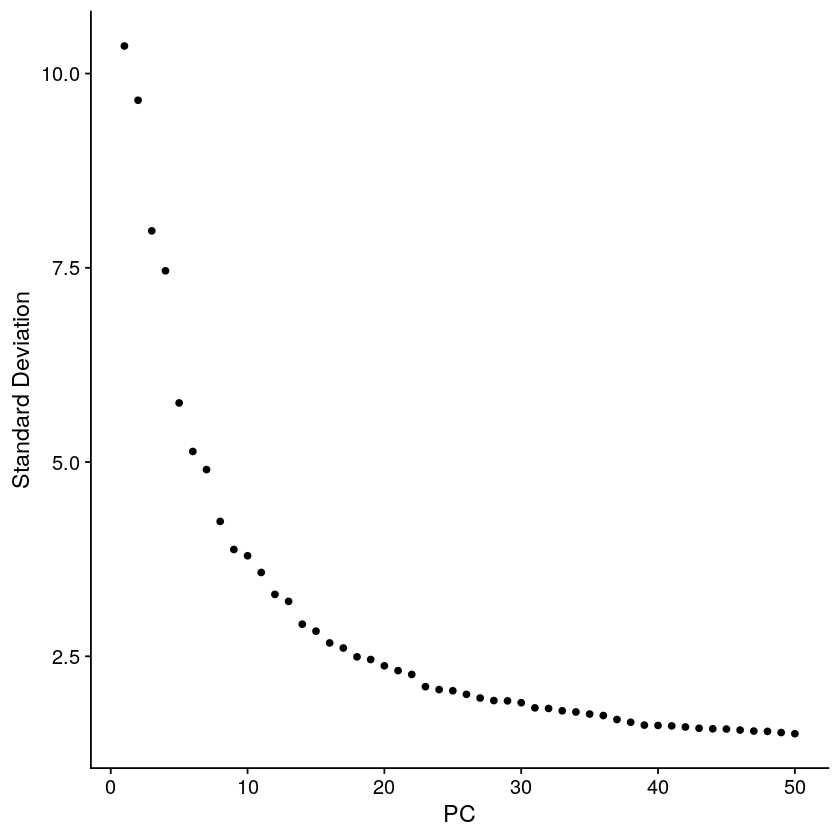

In [ ]:
DefaultAssay(data.combined) <- "integrated"
#this code sets the default assay as integrated after the integration of the datasets.

data.combined <- ScaleData(data.combined, verbose = FALSE)
#this code scales the expression data in the integrated dataset such that the mean across the data is 0 and variance is 1. verbose=FALSE doesn't give output messages for the function running.

data.combined <- RunPCA(data.combined, npcs = 50, verbose = FALSE)
#this commannd is used to run PCA(principal component analysis) for the dataset, the principal component set for this data is 50

ElbowPlot(data.combined, ndims = 50)
#this code gives an elbow plot made of 50 dimensions or pcs based on the above PCA result

In [ ]:
data.combined <- RunUMAP(data.combined, reduction = "pca", dims = 1:43)
#this code runs and gives a UMAP(Uniform Manifold Approximation and Projection), the dimension is set as 43 based on the elbow plot.

data.combined <- FindNeighbors(data.combined, reduction = "pca", dims = 1:43)
data.combined <- FindClusters(data.combined, resolution = 0.1)
#the FindNeighbors and FindClusters commands is used to cluster cells based on the nearest neighbours using graphs and are those cells are then clustered based on their groups.

16:37:22 UMAP embedding parameters a = 0.9922 b = 1.112

16:37:22 Read 11417 rows and found 43 numeric columns

16:37:22 Using Annoy for neighbor search, n_neighbors = 30

16:37:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:37:23 Writing NN index file to temp file /tmp/Rtmp0Pkf4g/file2362705356bb

16:37:23 Searching Annoy index using 1 thread, search_k = 3000

16:37:27 Annoy recall = 100%

16:37:27 Commencing smooth kNN distance calibration using 1 thread

16:37:28 Initializing from normalized Laplacian + noise

16:37:30 Commencing optimization for 200 epochs, with 486980 positive edges

16:37:36 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11417
Number of edges: 453501

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9805
Number of communities: 9
Elapsed time: 2 seconds


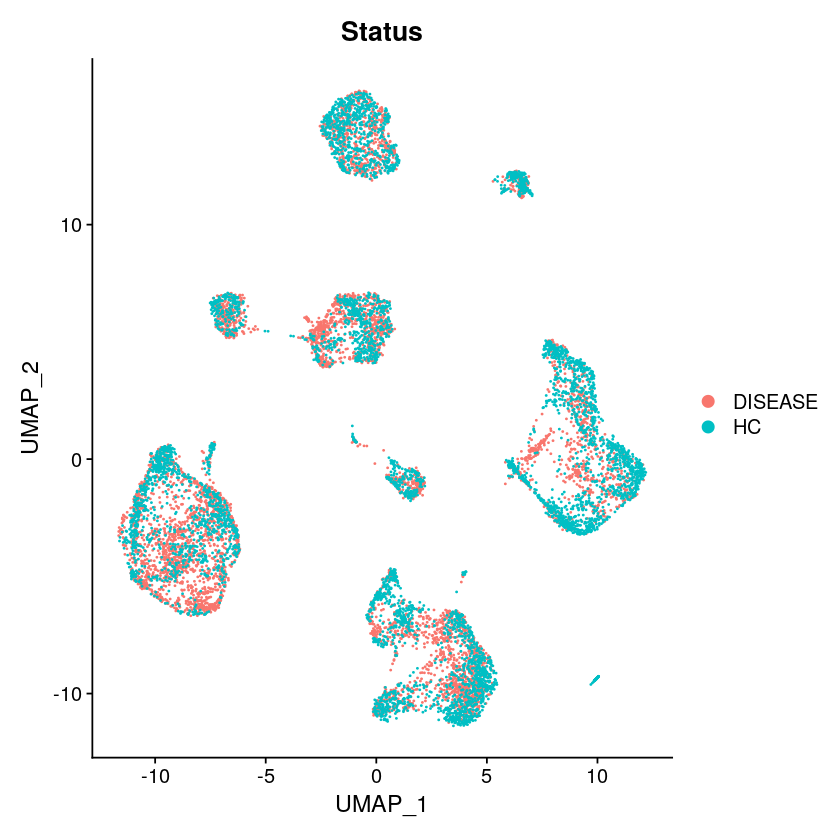

In [ ]:
DimPlot(data.combined, reduction = "umap", group.by = "Status")
#this code gives a dimensionality reduction plot-umap of the clusters formed and are grouped and coloured based on the condition of the cells- Healthy or Diseased.

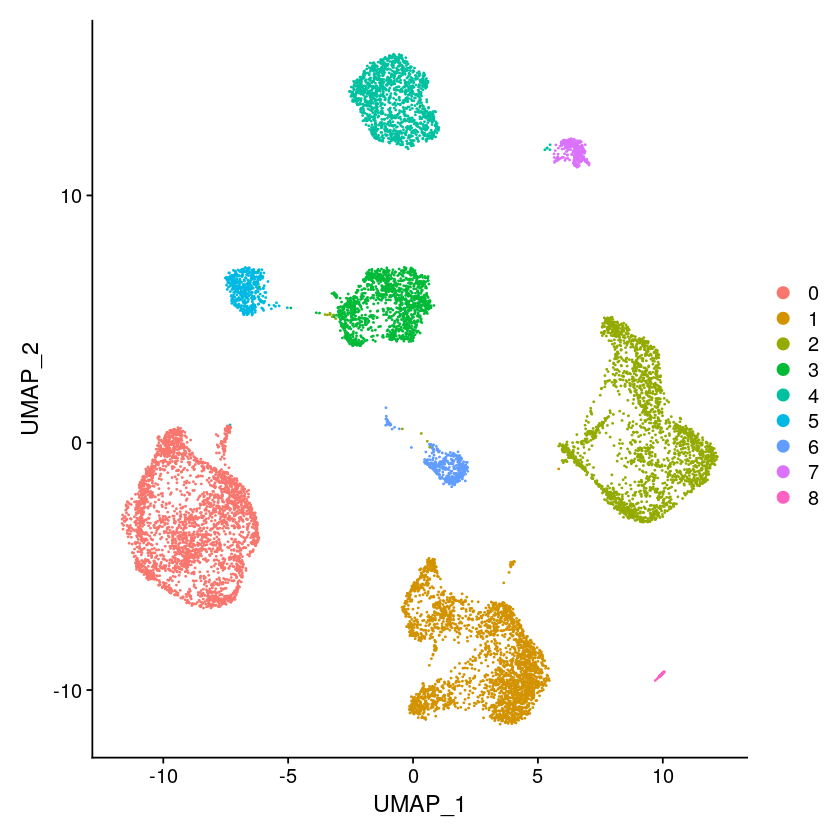

In [ ]:
DimPlot(data.combined, reduction = "umap")
#this code gives a dimensionality reduction plot-umap of the clusters that were formed.

In [ ]:
cluster0.markers <- FindMarkers(data.combined, ident.1 = 0, min.pct = 0.25, only.pos= T)
head(cluster0.markers, n = 20)
cluster1.markers <- FindMarkers(data.combined, ident.1 = 1, min.pct = 0.25, only.pos= T)
head(cluster1.markers, n = 20)
cluster2.markers <- FindMarkers(data.combined, ident.1 = 2, min.pct = 0.25, only.pos= T)
head(cluster2.markers, n = 20)
#the code FindMarkers gives the list of differentially expressed genes in a particular cluster compared to other clusters, here the top 20 markers are specified and only genes with positive foldchange of expression value will be listed.

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCL20,0,0.4661668,0.806,0.373,0
KRT16,0,3.1442829,0.824,0.260,0
KRTDAP,0,4.2611666,0.746,0.360,0
SERPINB2,0,3.3100434,0.920,0.424,0
S100A2,0,5.8665207,0.839,0.428,0
MT1G,0,0.4041726,0.743,0.377,0
SBSN,0,3.9079707,0.804,0.355,0
KRT17,0,3.0190640,0.752,0.300,0
HSPA1A.3,0,0.9824108,0.961,0.800,0


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRBV7-2.1,0,1.6173652,0.673,0.325,0
TRBV30,0,0.3650387,0.548,0.060,0
TPSAB1,0,0.9621148,0.667,0.250,0
TRAV12-3,0,0.6179908,0.618,0.212,0
TRBV7-2,0,0.4067989,0.705,0.264,0
KLRB1,0,1.9024480,0.666,0.050,0
TRBV6-1,0,0.4100175,0.603,0.118,0
KLRC1,0,1.0490028,0.583,0.124,0
TRBV5-6,0,0.2778198,0.544,0.087,0


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCL5,0,2.7694059,0.667,0.325,0
CCL22,0,6.3939151,0.912,0.568,0
CXCL8,0,4.1746937,0.917,0.399,0
FABP5,0,1.8266774,0.836,0.426,0
ACOT7,0,2.4310834,0.718,0.365,0
INHBA,0,1.4943503,0.692,0.158,0
C11orf86,0,1.1079514,0.689,0.371,0
CD207,0,1.4903132,0.681,0.164,0
IDO1,0,4.9698538,0.933,0.430,0


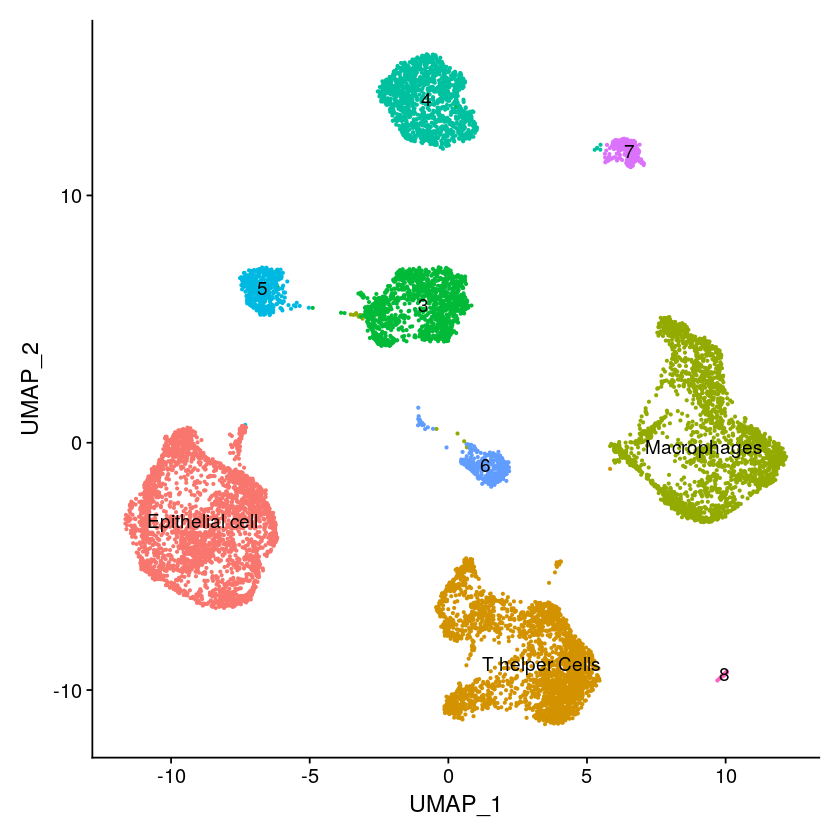

In [ ]:
new.cluster.ids <- c("Epithelial cell", "T helper Cells", "Macrophages","3","4","5","6","7","8")
names(new.cluster.ids) <- levels(data.combined)
data.combined <- RenameIdents(data.combined, new.cluster.ids)
DimPlot(data.combined, reduction = 'umap', label = TRUE, pt.size = 0.5) + NoLegend()
#these codes are used for assigning names to the clusters based on their celltypes. first a list is made which contains the names each cluster has to be given, then the exisiting values are renamed by the assigned names and an UMAP with the names cluster is displayyed.

In [ ]:
saveRDS(data.combined,"Annotated.data.Combined.rds")
#this is used to save the object as a RDS file

Warning message:
“Use of `freq_table_sample$Var2` is discouraged. Use `Var2` instead.”
Warning message:
“Use of `freq_table_sample$Freq` is discouraged. Use `Freq` instead.”
Warning message:
“Use of `freq_table_sample$Var1` is discouraged. Use `Var1` instead.”


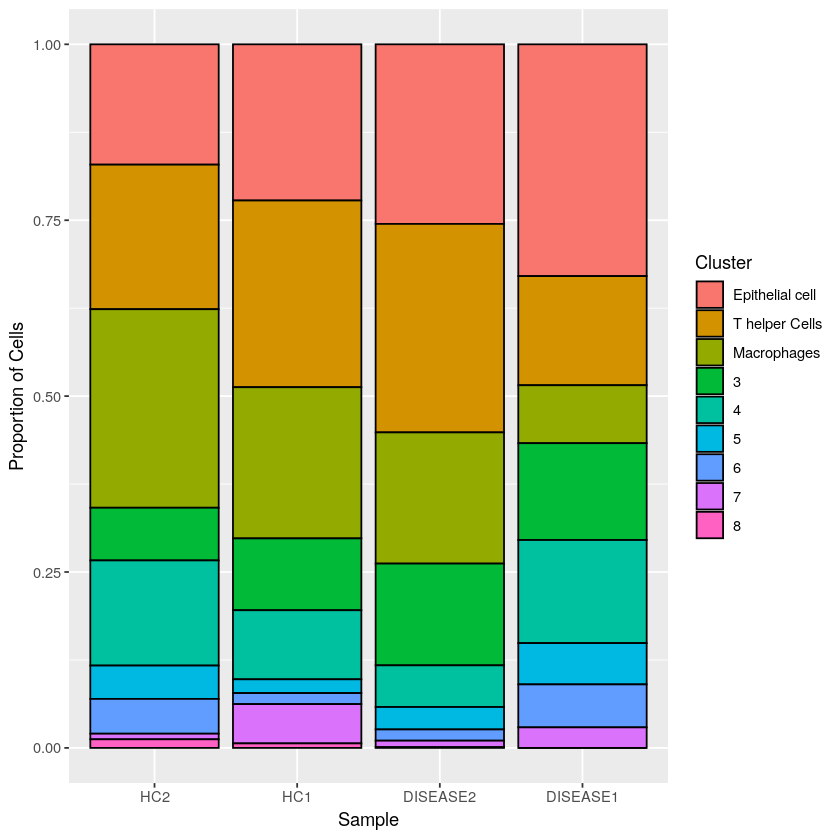

In [ ]:
freq_table_sample <- as.data.frame(prop.table(x = table(Idents(data.combined), data.combined@meta.data$orig.ident), margin = 2))
ggplot(data=freq_table_sample, aes(x=freq_table_sample$Var2, y=freq_table_sample$Freq, fill=freq_table_sample$Var1)) + geom_bar(stat="identity", color="black") + labs(x="Sample", y="Proportion of Cells", fill="Cluster")  + scale_x_discrete(limits = rev(levels(freq_table_sample$Var2)))

#a stacked barplot is made using these commands which compare the diseased and healthy condition in all samples denoting the number of cells in each cluster.

In [ ]:
saveRDS(data.combined,"Annotated.data.Combined.rds")
#this is used to save the object as a RDS file

Warning message:
“Could not find IL7R in the default search locations, found in RNA assay instead”


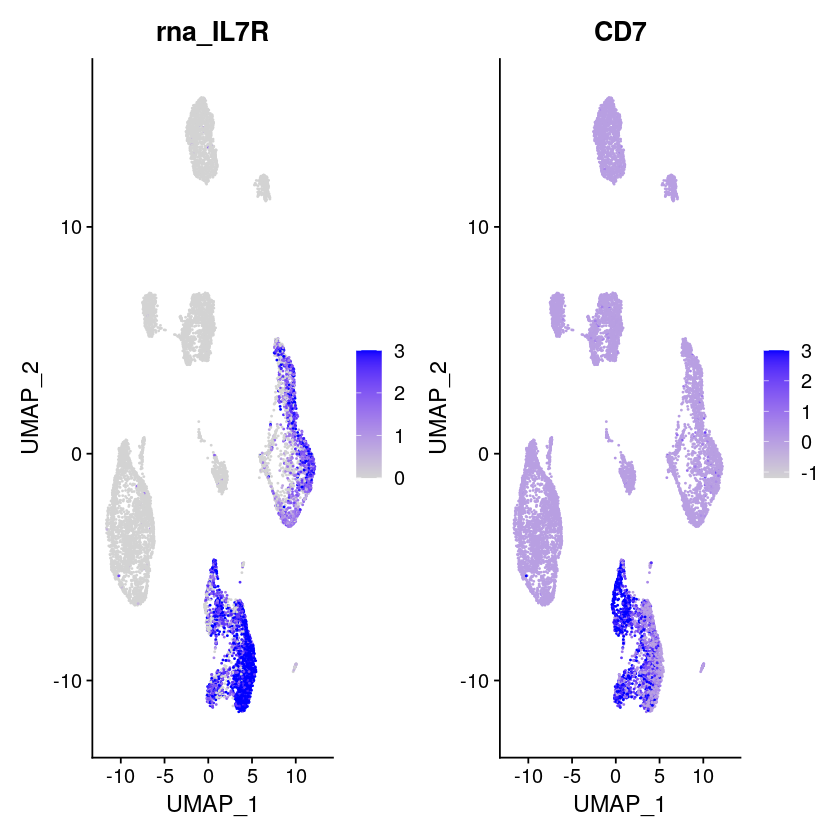

In [ ]:
FeaturePlot(data.combined, features = c("IL7R", "CD7"), max.cutoff = 3)
#this code gives a feature plot comparing the markers IL7R and CD7 to view their expression levels in each cluster.

In [ ]:
DefaultAssay(data.combined) <- "RNA"
#this code is used to set the default assay as "RNA"

In [ ]:
data.combined@meta.data
#this code gives the meta data of the integrated object, the metadata includes all the information about each cell.

,orig.ident,nCount_RNA,nFeature_RNA,run,individual,sex,dev_stage,Status,percent.mt,integrated_snn_res.0.1,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
ERR5263321-GAACGGAAGTACGTTC-,DISEASE1,2467,1102,ERR5263321,E2,female,adult,DISEASE,1.9051480,2,2
ERR5263319-CTGCCTAGTAGCTTGT-,DISEASE1,2962,1161,ERR5263319,E2,female,adult,DISEASE,0.6583390,1,1
ERR5263318-GGCGTGTGTACCCAAT-,DISEASE1,4612,1848,ERR5263318,E2,female,adult,DISEASE,3.9436253,3,3
ERR5263318-CCGGGATTCGACAGCC-,DISEASE1,4627,2061,ERR5263318,E2,female,adult,DISEASE,2.5070240,4,4
ERR5263315-TCGCGTTCAGACGTAG-,DISEASE1,4124,1220,ERR5263315,E2,female,adult,DISEASE,0.8971872,0,0
ERR5263319-GTCAAGTGTGTGAATA-,DISEASE1,5843,1427,ERR5263319,E2,female,adult,DISEASE,3.0634948,2,2
ERR5263318-TGTTCCGTCACAGGCC-,DISEASE1,2347,1096,ERR5263318,E2,female,adult,DISEASE,2.0451640,3,3
ERR5263321-GCGACCAGTAAGGGCT-,DISEASE1,864,391,ERR5263321,E2,female,adult,DISEASE,1.1574074,0,0
ERR5263320-CAAGGCCAGAGTGAGA-,DISEASE1,15439,2454,ERR5263320,E2,female,adult,DISEASE,1.5739361,0,0


In [ ]:
#data.combined$Status <- paste(Idents(data.combined), data.combined$Status, sep= "_")
#this code adds a column called Status and pastes the values of the cluster identities along with the status(Condition) of the cells.

In [ ]:
Idents(data.combined) <- "Status"
#this code gives the column a name as "Status".

In [ ]:
mark<- FindMarkers(data.combined, ident.1 = "T helper Cells_DISEASE", ident.2= "T helper Cells_HC", verbose= FALSE)
head(mark,n=15)
#this code gives the names of top 15 genes which are differentially expressed in The T helper cells cluster between Diseased and Healthy Cnditions.

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-B.5,0.000000e+00,5.1319641,0.953,0.030,0.000000e+00
HLA-A.4,2.731607e-246,-1.9052316,0.547,0.974,7.930674e-242
HLA-E.1,4.000836e-236,-1.7607508,0.604,0.948,1.161563e-231
HLA-C,1.670798e-227,3.1428875,0.601,0.019,4.850828e-223
RPS4Y1,5.175774e-198,2.3039642,0.518,0.000,1.502682e-193
HLA-E.2,6.734434e-195,1.5384475,0.623,0.072,1.955208e-190
HLA-A.5,1.488346e-178,2.4428810,0.477,0.000,4.321114e-174
HLA-DRB1,1.487382e-171,2.2507896,0.556,0.067,4.318316e-167
IGHA1.1,1.340277e-156,-1.8344605,0.020,0.475,3.891227e-152


In [ ]:
markers1<- subset(mark,  mark$p_val_adj<0.01 & mark$avg_log2FC > 0.5, sep="\t")
#this code is used to subset the dataframe "mark" into markers1 by filtering the genes that have their adjusted p values less than 0.01 and average log2 fold change greater than 0.5

In [ ]:
write.table(markers1, "ma.txt")
nrow(read.table("ma.txt"))
read.table("ma.txt")
#this code writes the data in markers1 as a text file and reads the table along with displaying the number of rows for calculating the number of upregulated genes.

[1] 118

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-B.5,0.000000e+00,5.1319641,0.953,0.030,0.000000e+00
HLA-C,1.670798e-227,3.1428875,0.601,0.019,4.850828e-223
RPS4Y1,5.175774e-198,2.3039642,0.518,0.000,1.502682e-193
HLA-E.2,6.734434e-195,1.5384475,0.623,0.072,1.955208e-190
HLA-A.5,1.488346e-178,2.4428810,0.477,0.000,4.321114e-174
HLA-DRB1,1.487382e-171,2.2507896,0.556,0.067,4.318316e-167
HLA-E,1.299291e-155,1.2309829,0.533,0.063,3.772232e-151
RPS29,5.115693e-152,1.1665284,0.957,0.936,1.485239e-147
HLA-A,3.444290e-146,2.0716606,0.425,0.012,9.999808e-142


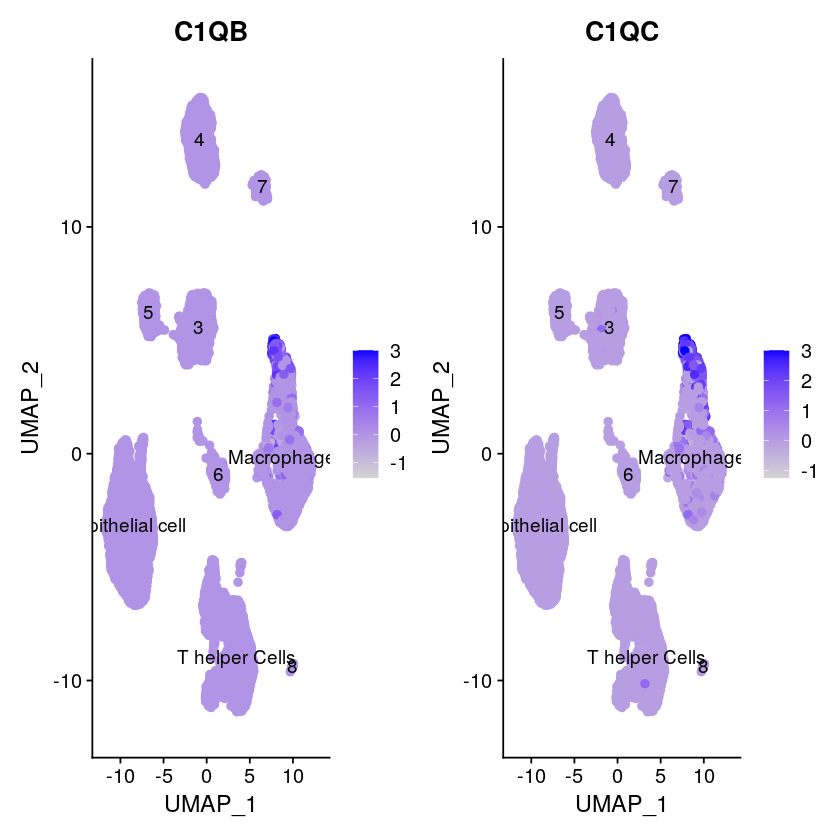

In [ ]:
FeaturePlot(data.combined, features = c("C1QB", "C1QC"), max.cutoff = 3, pt.size=2, label=TRUE)
#this code gives a feature plot comparing the markers C1QB and C1QC to view their expression levels in each cluster.

In [ ]:
cluster_subset <- subset(x = data.combined, idents = c("Macrophages"))

In [ ]:
cluster_subset <- NormalizeData(cluster_subset)
cluster_subset <- FindVariableFeatures(cluster_subset, selection.method = "vst", nfeatures = 2000)
cluster_subset <- ScaleData(cluster_subset, verbose = FALSE)
cluster_subset <- RunPCA(cluster_subset, npcs = 50, verbose = FALSE)
ElbowPlot(cluster_subset, ndims = 50)

In [ ]:
cluster_subset <- RunUMAP(cluster_subset, reduction = "pca", dims = 1:43)
cluster_subset <- FindNeighbors(cluster_subset, reduction = "pca", dims = 1:43)
cluster_subset <- FindClusters(cluster_subset, resolution = 0.45)

In [ ]:
DimPlot(cluster_subset, reduction = "umap", label=TRUE)
cluster_subset.ids <- c("0", "1", "2","3","4", "5")
names(cluster_subset.ids) <- levels(cluster_subset)
cluster_subset <- RenameIdents(cluster_subset, cluster_subset.ids)
DimPlot(cluster_subset, reduction = 'umap', label = TRUE, pt.size = 2) + NoLegend()

In [ ]:
FeaturePlot(cluster_subset, features = c("C1QB", "C1QC"), max.cutoff = 3, label=TRUE, pt.size=1.5)
VlnPlot(cluster_subset, features = c("C1QB", "C1QC"))

In [ ]:
DefaultAssay(cluster_subset) <- "RNA"
cluster_subset@meta.data

In [ ]:
#cluster_subset$Status <- paste(Idents(cluster_subset), cluster_subset$Status, sep= "_")

In [ ]:
Idents(cluster_subset) <- "Status"

In [ ]:
mark3_6<- FindMarkers(cluster_subset, ident.1 = "5_DISEASE", ident.2= "5_HC", verbose= FALSE)
head(mark3_6, n=15)

ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: 5_DISEASE


In [ ]:
markers3_6<- subset(mark3_6,  mark3_6$p_val_adj<0.01 & mark3_6$avg_log2FC > 0.5, sep="\t")
write.table(markers3_6, "ma3.txt")
nrow(read.table("ma3.txt"))
read.table("ma3.txt")